# Compute Error Between S Parameter Matrices

In [1]:
import skrf as rf
import matplotlib.pyplot as plt
import numpy as np

### Load data

Text(0.5, 1.0, 'LFCN-2352+')

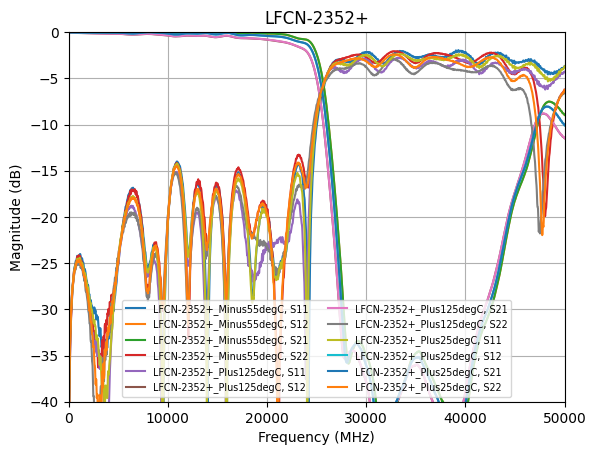

In [12]:
ns = rf.NetworkSet.from_zip('LFCN-2352+_S2P.zip')
ns.plot_s_db()
plt.legend(loc='lower center',ncols=2,fontsize='x-small')
plt.grid()
plt.ylim(-40, 0)
plt.xlim(0, 50e9)
plt.title(f'LFCN-2352+')

### Compute Error and Plot Results

Text(0.5, 0, 'Frequency (MHz)')

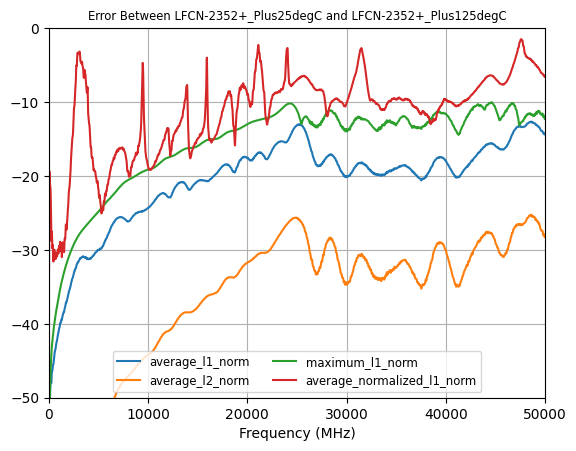

In [15]:
error_functions = [
    "average_l1_norm",
    "average_l2_norm",
    "maximum_l1_norm",
    "average_normalized_l1_norm",
]

for ef in error_functions:
    error = rf.s_error(ntwkA=ns[2], ntwkB=ns[1], error_function=ef)
    plt.plot(ns[2].frequency.f_scaled, 20 * np.log10(error), label=ef)

plt.legend(fontsize='small',ncols=2,loc='lower center')
plt.grid()
plt.ylim(-50, 0)
plt.xlim(0, 50000)
plt.title(f"Error Between {ns[2].name} and {ns[1].name}",fontsize='small');
plt.xlabel('Frequency (MHz)')